In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import pandas as pd
# Cargar el archivo Parquet
data_local = pd.read_parquet(r'..\data\raw\BTCUSDT_1h_2024-01-01_2024-07-01.parquet')



In [2]:
from IPython.display import display
# Convertir la columna 'timestamp' a un formato datetime
data_local['datetime'] = pd.to_datetime(data_local['timestamp'], unit='ms', utc=True)
# Establecer 'datetime' como índice
data_local.set_index('datetime', inplace=True)
# Asegurarse de que las columnas sean numéricas (float)
data_local[['open', 'high', 'low', 'close', 'volume']] = data_local[['open', 'high', 'low', 'close', 'volume']].apply(pd.to_numeric, errors='coerce')
# Redondear las columnas 'open', 'high', 'low', 'close', 'volume' a dos decimales
data_local[['open', 'high', 'low', 'close', 'volume']] = data_local[['open', 'high', 'low', 'close', 'volume']].round(2)
# Mostrar los primeros registros de forma más clara
pd.set_option('display.float_format', '{:.0f}'.format)
display(data_local[['open', 'high', 'low', 'close', 'volume']].head(5))

C:\Users\DELL-LATITUDE\AppData\Local\Temp\ipykernel_6844\2670640402.py:3: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  data_local['datetime'] = pd.to_datetime(data_local['timestamp'], unit='ms', utc=True)


,open,high,low,close,volume
datetime,,,,,
2024-01-01 00:00:00+00:00,42314,42598,42290,42504,99860302
2024-01-01 01:00:00+00:00,42504,42824,42462,42648,106721170
2024-01-01 02:00:00+00:00,42648,42677,42533,42620,55541187
2024-01-01 03:00:00+00:00,42620,42630,42275,42370,96618126
2024-01-01 04:00:00+00:00,42370,42440,42237,42432,75869555


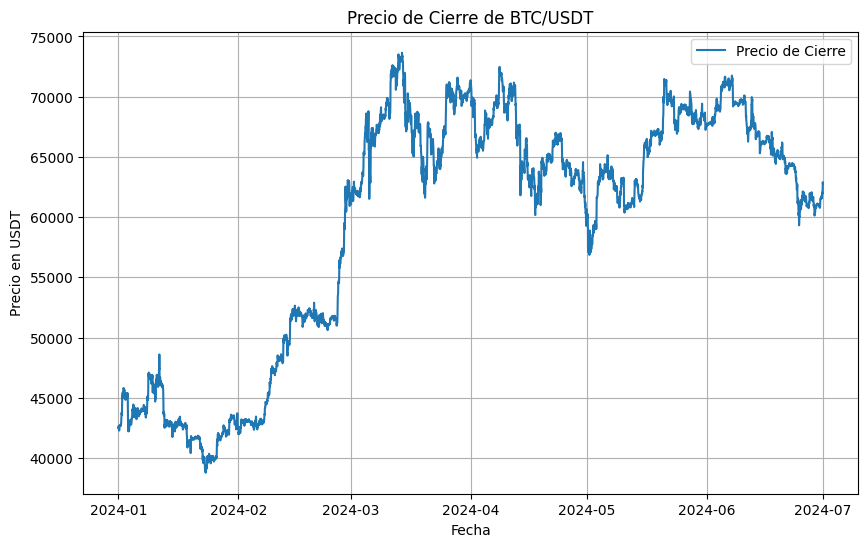

In [3]:
# Graficar los datos
import matplotlib.pyplot as plt
# Graficar los precios de cierre
plt.figure(figsize=(10, 6))
plt.plot(data_local.index, data_local['close'], label='Precio de Cierre')
plt.title('Precio de Cierre de BTC/USDT')
plt.xlabel('Fecha')
plt.ylabel('Precio en USDT')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
from src.utils import load_config
from src import indicators  # <-- Esto ejecuta los decoradores y registra los indicadores
from src.feature_engine import FeatureEngine

# Leer configuración
config = load_config()
# Inicializar FeatureEngine
fe = FeatureEngine(data_local)
print(fe)

2025-07-04 19:18:12,270 - src.registry - INFO - Indicador 'sma' registrado
2025-07-04 19:18:12,271 - src.registry - INFO - Indicador 'ema' registrado
2025-07-04 19:18:12,272 - src.registry - INFO - Indicador 'rsi' registrado
2025-07-04 19:18:12,272 - src.registry - INFO - Indicador 'stochastic' registrado
2025-07-04 19:18:12,273 - src.registry - INFO - Indicador 'bollinger_bands' registrado
2025-07-04 19:18:12,273 - src.registry - INFO - Indicador 'atr' registrado
2025-07-04 19:18:12,274 - src.registry - INFO - Indicador 'macd' registrado
2025-07-04 19:18:12,275 - src.registry - INFO - Indicador 'momentum' registrado
2025-07-04 19:18:12,276 - src.registry - INFO - Indicador 'volume_sma' registrado
2025-07-04 19:18:12,276 - src.registry - INFO - Indicador 'price_volume_trend' registrado
2025-07-04 19:18:12,277 - src.registry - INFO - Indicador 'support_resistance' registrado
2025-07-04 19:18:12,925 - src.utils - INFO - Configuración cargada exitosamente desde: C:\Users\DELL-LATITUDE\Doc

FeatureEngine(data_shape=(4348, 6), features=0, cache_size=0)


In [5]:
# Agregar indicadores según config
for ind in config['feature_engine']['indicators']:
    name = ind['name']
    params = ind.get('params', {})
    normalize = ind.get('normalize', True)
    scaler = ind.get('scaler', "standard")
    fe.add_indicator(name, params, normalize, scaler)
# Guardar features procesados
fe.export_features(
    path="data/processed/features_BTCUSDT_1h_2024-01-01_2024-07-01.parquet",
    format="parquet")

2025-07-04 19:18:12,938 - src.feature_engine - WARNING - Valores faltantes detectados en rsi, aplicando imputación
c:\Users\DELL-LATITUDE\Documents\My_Projects\PYTHON\trading_quantitative\src\feature_engine.py:190: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series = series.fillna(method='ffill').fillna(method='bfill')
2025-07-04 19:18:12,940 - src.feature_engine - INFO - Serie rsi normalizada con minmax
2025-07-04 19:18:12,941 - src.feature_engine - INFO - Feature 'rsi_period14' añadido exitosamente
2025-07-04 19:18:12,945 - src.feature_engine - INFO - Añadido indicador múltiple bollinger_bands con 5 features
2025-07-04 19:18:12,947 - src.feature_engine - INFO - Serie ema normalizada con standard
2025-07-04 19:18:12,948 - src.feature_engine - INFO - Feature 'ema_period12' añadido exitosamente
2025-07-04 19:18:12,950 - src.feature_engine - INFO - Serie ema normalizada con standard
2025-07-04 19:1

'data\\processed\\features_BTCUSDT_1h_2024-01-01_2024-07-01.parquet'

In [8]:
feature_local = pd.read_parquet(r'data\processed\features_BTCUSDT_1h_2024-01-01_2024-07-01.parquet')
print(feature_local)

                           rsi_period14  \
datetime                                  
2024-01-01 00:00:00+00:00             1   
2024-01-01 01:00:00+00:00             1   
2024-01-01 02:00:00+00:00             1   
2024-01-01 03:00:00+00:00             1   
2024-01-01 04:00:00+00:00             1   
...                                 ...   
2024-06-30 19:00:00+00:00             1   
2024-06-30 20:00:00+00:00             1   
2024-06-30 21:00:00+00:00             1   
2024-06-30 22:00:00+00:00             1   
2024-06-30 23:00:00+00:00             1   

                           bollinger_bands_bb_upper_period20_std_dev2  \
datetime                                                                
2024-01-01 00:00:00+00:00                                         NaN   
2024-01-01 01:00:00+00:00                                         NaN   
2024-01-01 02:00:00+00:00                                         NaN   
2024-01-01 03:00:00+00:00                                         NaN   
20